# Final Project Machine Learning


## Member
### Trương Gia Bảo - 521H0201
### Vi Thành Đạt - 521H0390

## Import Library

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

## Data Infomation

In [66]:
data = pd.read_csv("googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [67]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [68]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Data Preprocessing

In [69]:
# Removing irrelevant features
data = data.drop(['App','Last Updated','Current Ver','Android Ver'],axis='columns')
data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [70]:
data=data.drop(data.index[data[~data.Reviews.str.isnumeric()].index])

In [71]:
data['Reviews'] = data['Reviews'].astype(int)  # Convert 'Reviews' column to integer type

data['Size'] = data['Size'].apply(lambda x: str(x).
                                            replace('M', '').
                                            replace('k', ''))  # Remove 'k' , 'M' from 'Size' column

data['Price'] = data['Price'].apply(lambda x: float(str(x).
                                                    replace('$', ''))) # Remove 'k' from 'Size' column

data['Installs'] = data['Installs'].apply(lambda x: int(str(x).
                                                        replace('+', '').
                                                        replace(',','')))  # Remove '+' from 'Installs' column


data['Size'] = pd.to_numeric(data['Size'], errors='coerce')
# Calculate the mean excluding NaN values
mean_size = data['Size'].mean(skipna=True)

# Replace "Varies with device" with the mean value
data['Size'].fillna( mean_size, inplace=True)

data

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.00000,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.70000,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.00000,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.80000,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53.00000,5000,Free,0.0,Everyone,Education
10837,FAMILY,5.0,4,3.60000,100,Free,0.0,Everyone,Education
10838,MEDICAL,NaN,3,9.50000,1000,Free,0.0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,37.03544,1000,Free,0.0,Mature 17+,Books & Reference


In [72]:
data.dtypes

Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

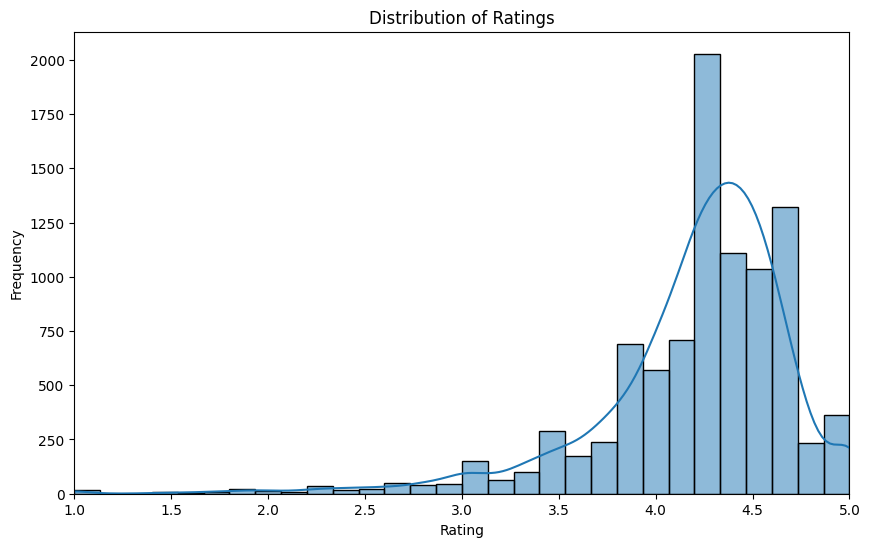

In [73]:
# Plot histogram for Rating
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.xlim((1,5))
plt.ylabel('Frequency')
plt.show()

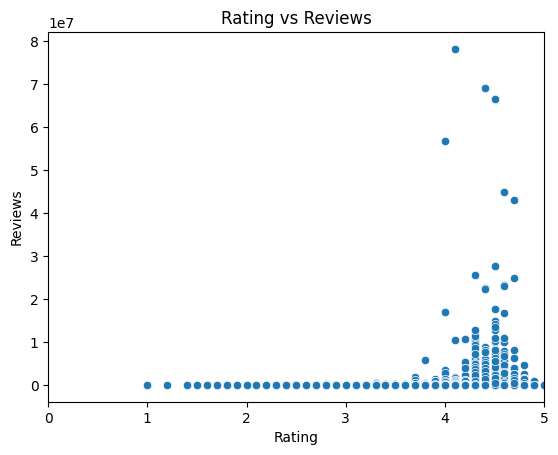

In [74]:
# Scatter plot for Rating vs Reviews
sns.scatterplot(x='Rating', y='Reviews', data=data)
plt.title('Rating vs Reviews')
plt.xlim((0,5))
plt.show()

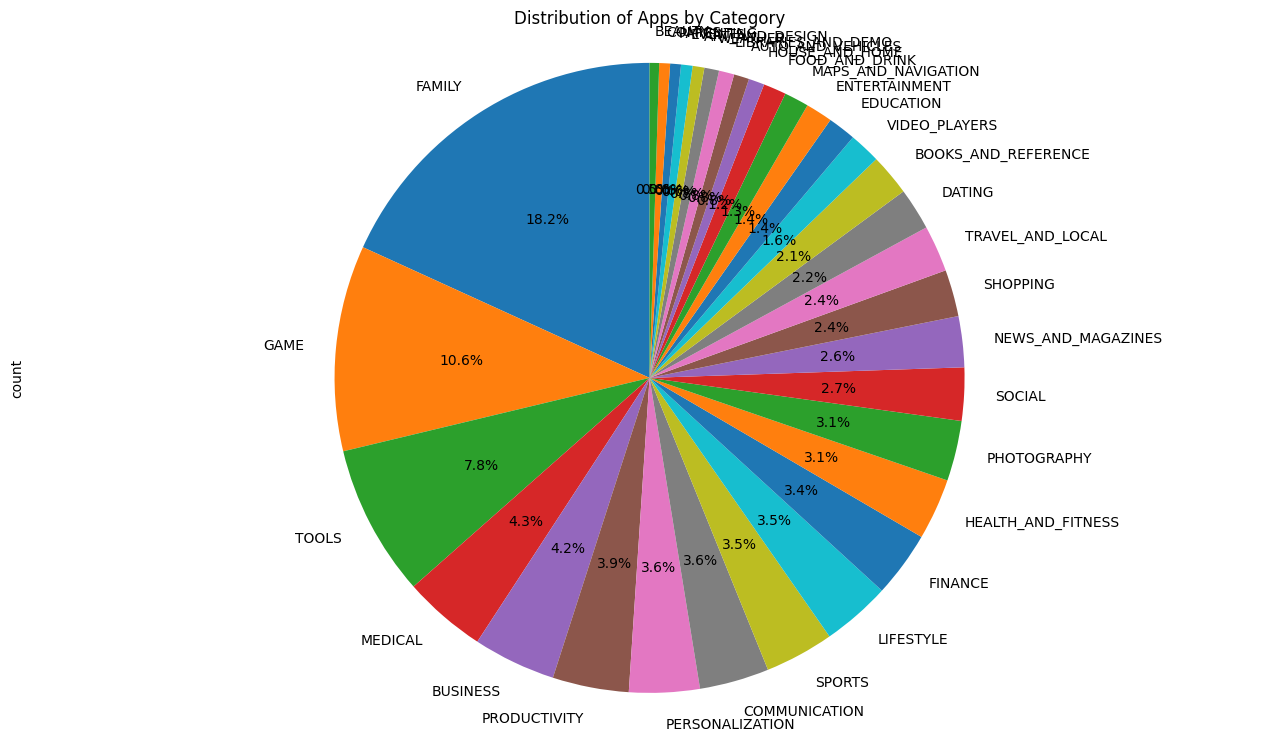

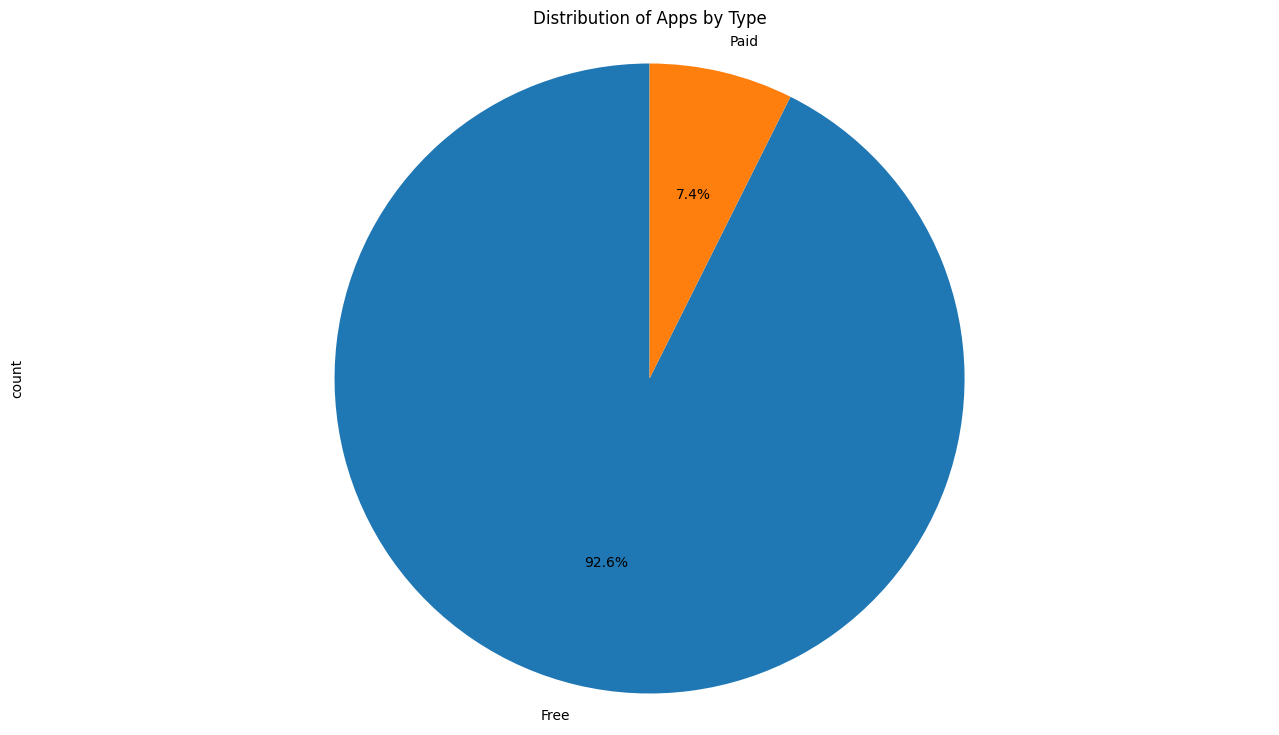

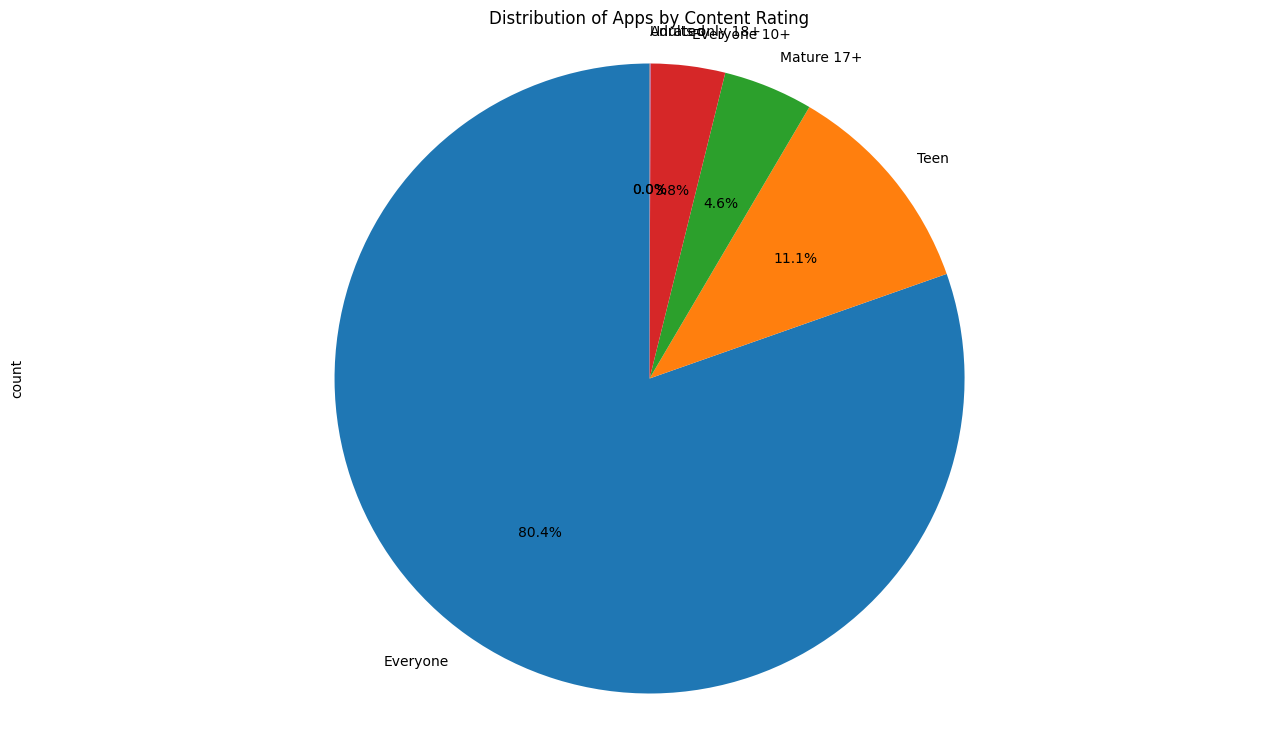

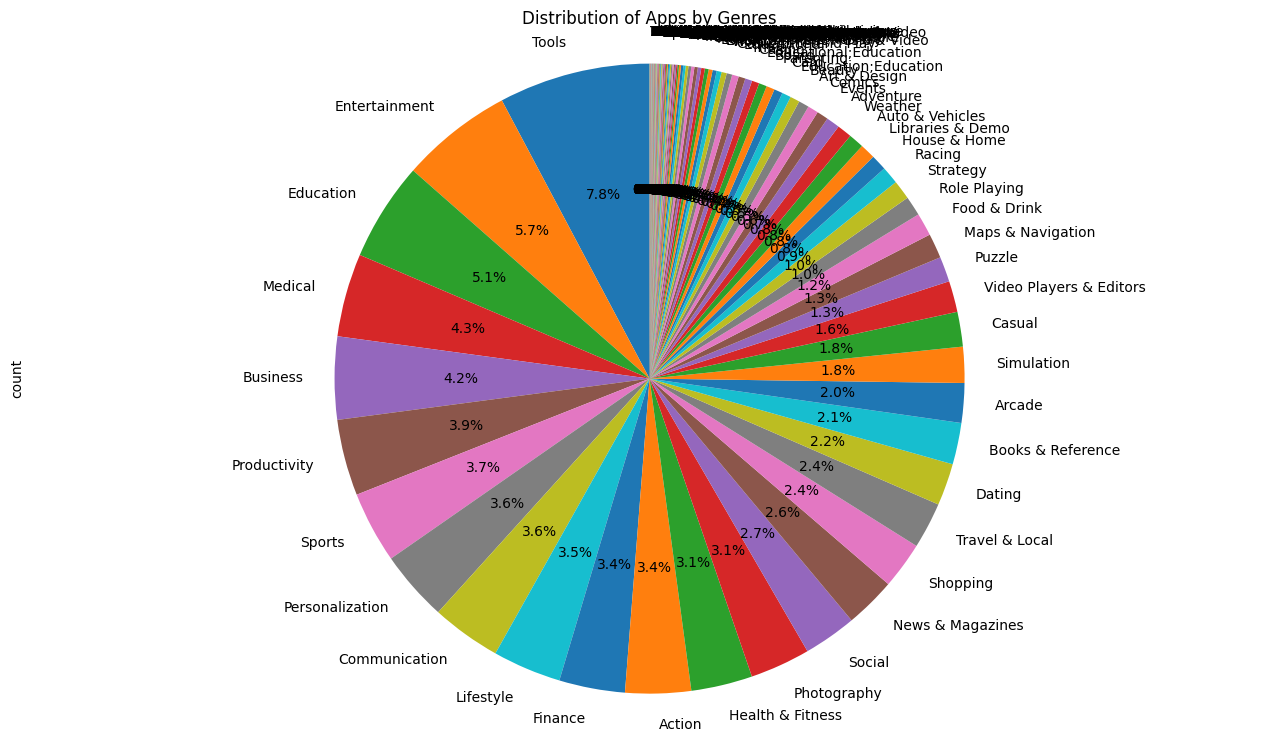

In [75]:
# Loop through columns
for col in data.columns:
    if data[col].dtype != 'object':
        continue  # Skip non-categorical columns

    # Create subplots
    fig, ax = plt.subplots(figsize=(16,9))

    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Distribution of Apps by {col}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

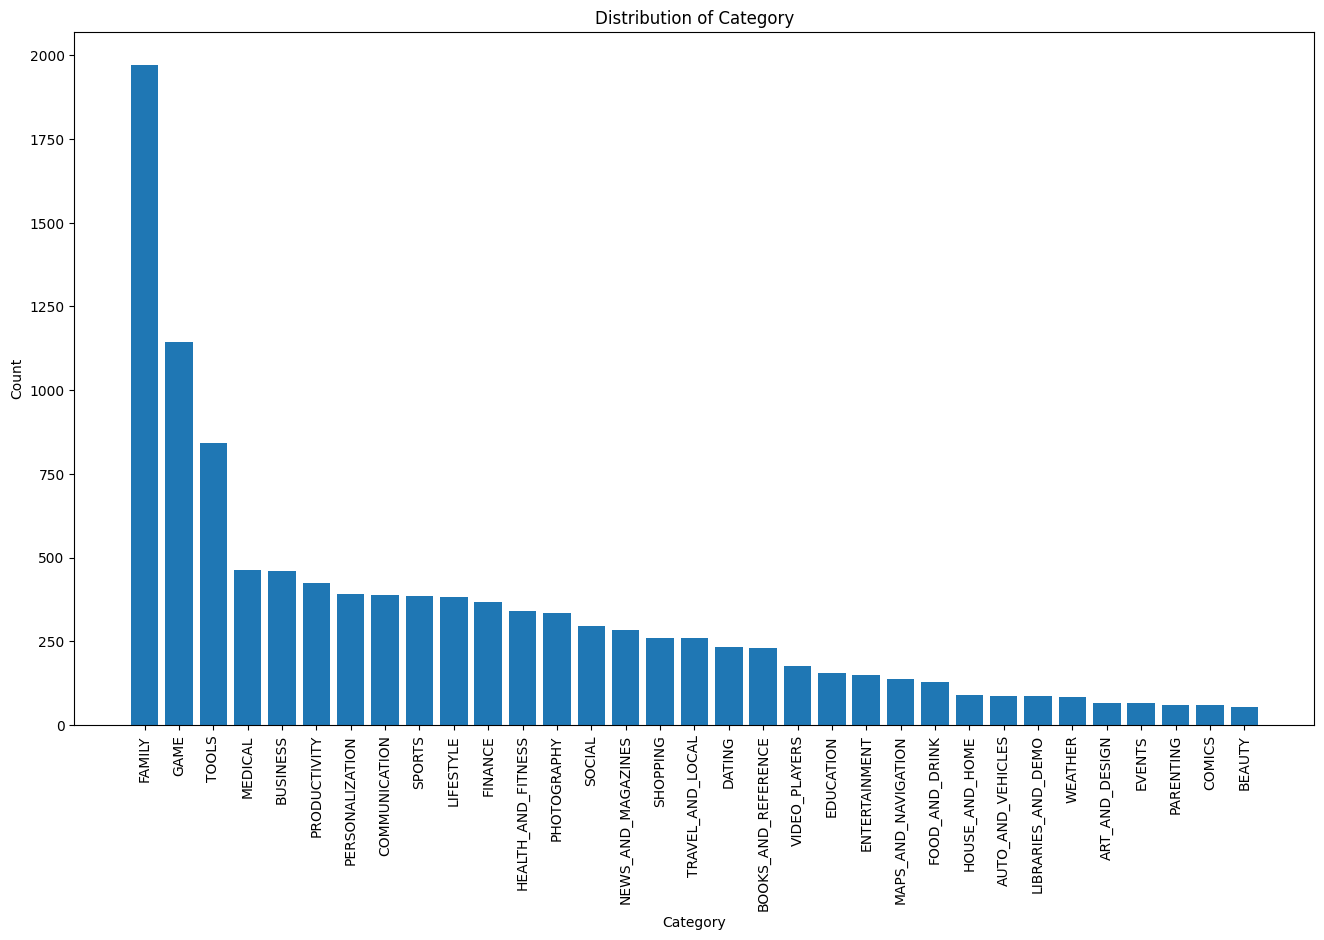

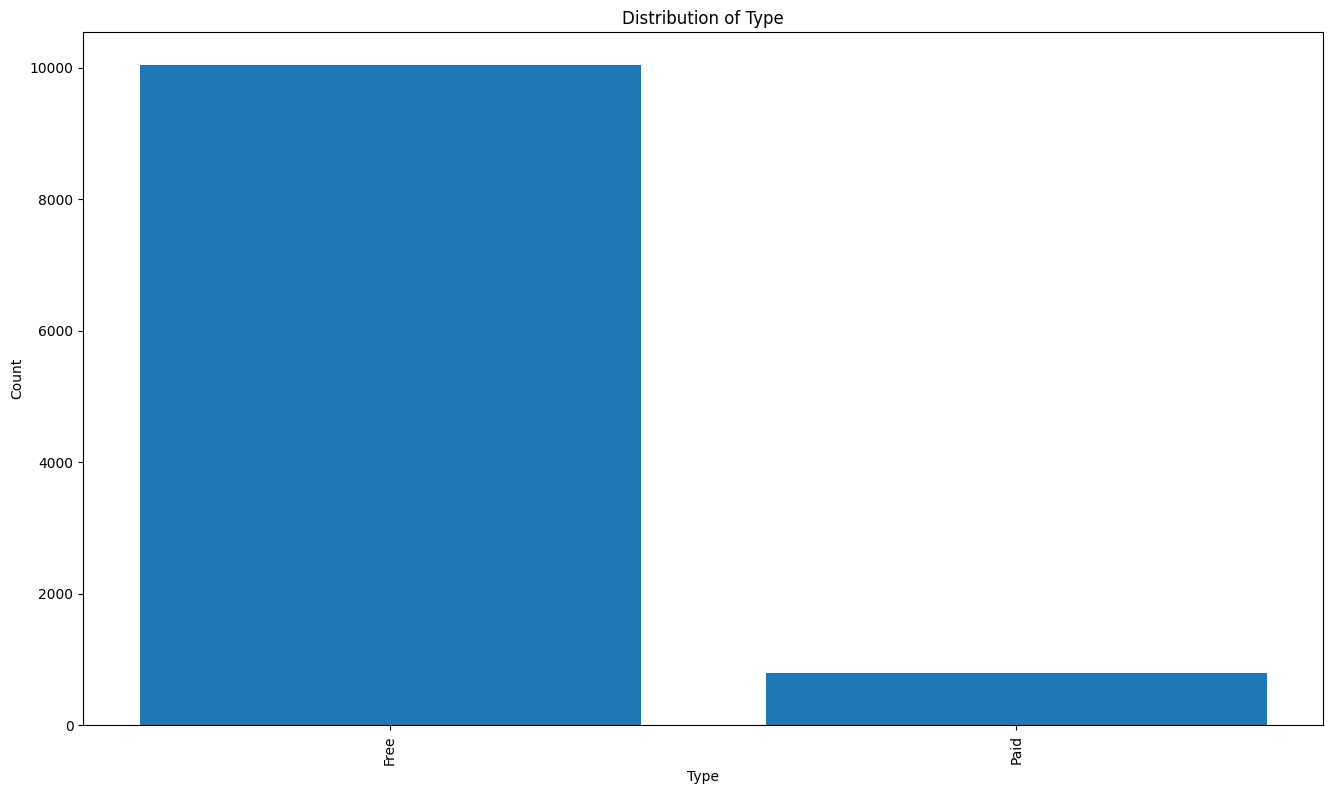

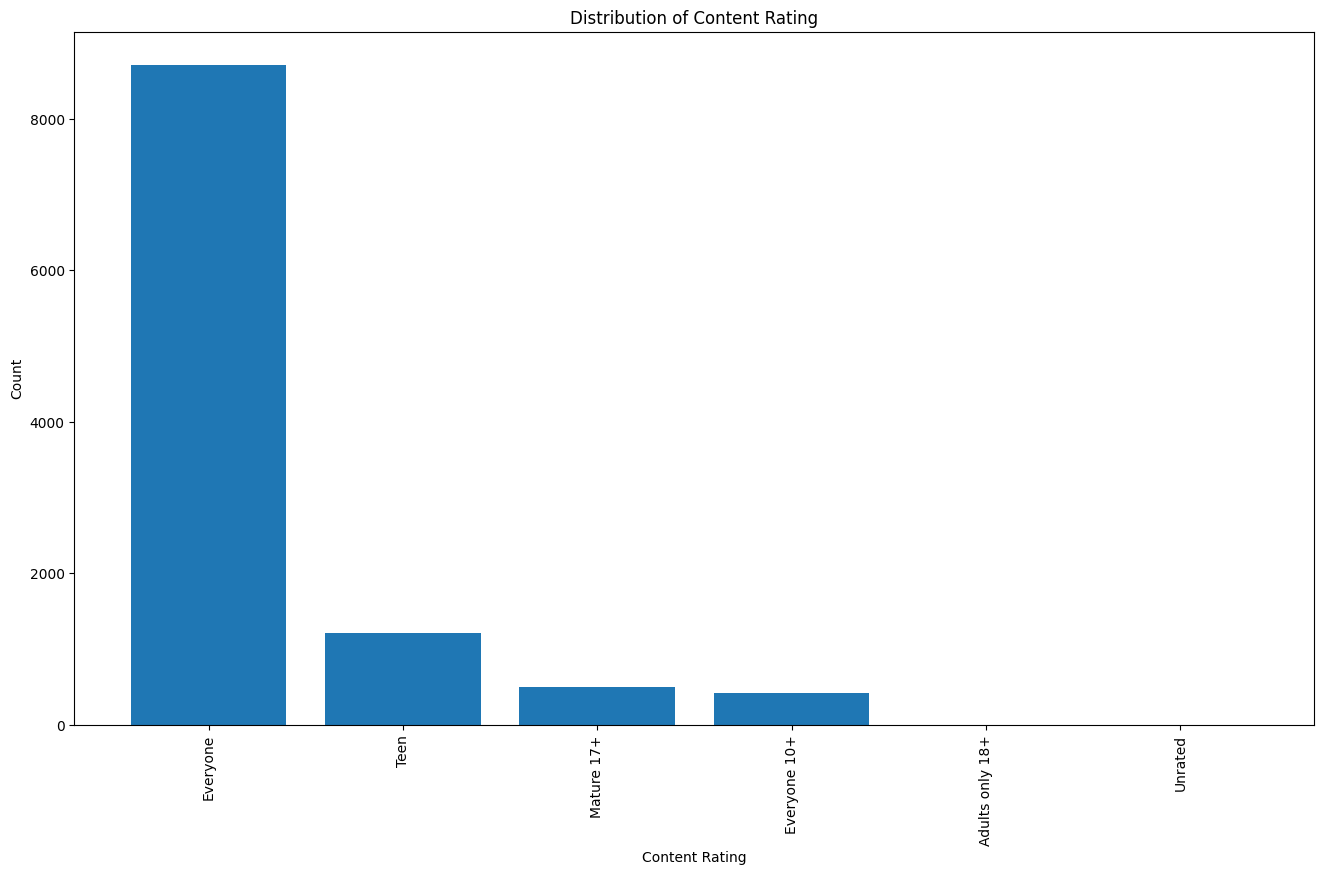

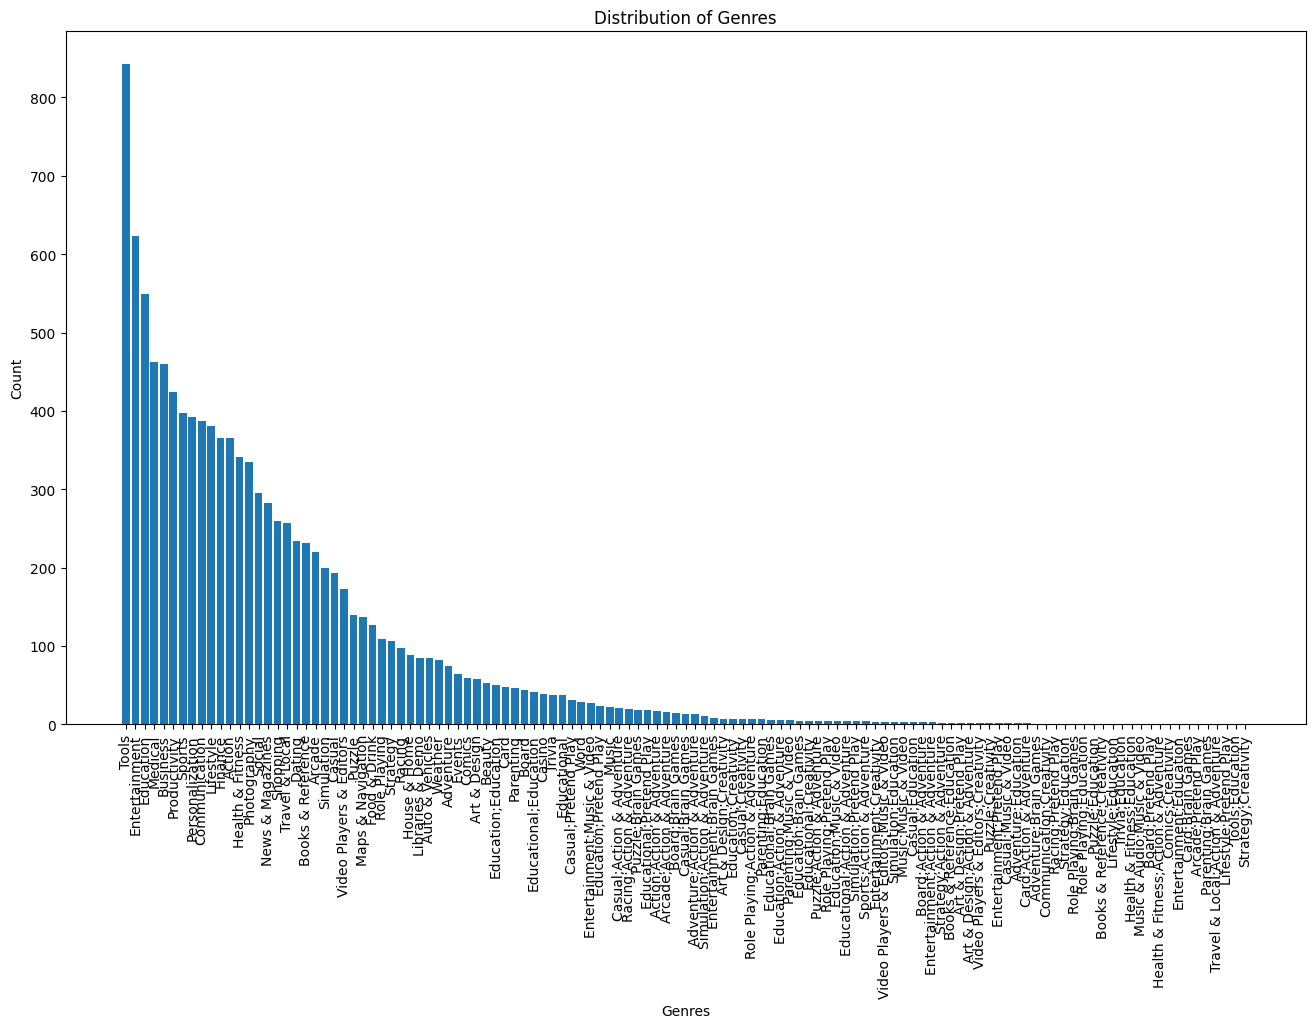

In [76]:
# Loop through columns
for col in data.columns:
    if data[col].dtype != 'object':
        continue  # Skip non-categorical columns
    plt.figure(figsize=(16, 9))
    category_counts = data[col].value_counts()
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

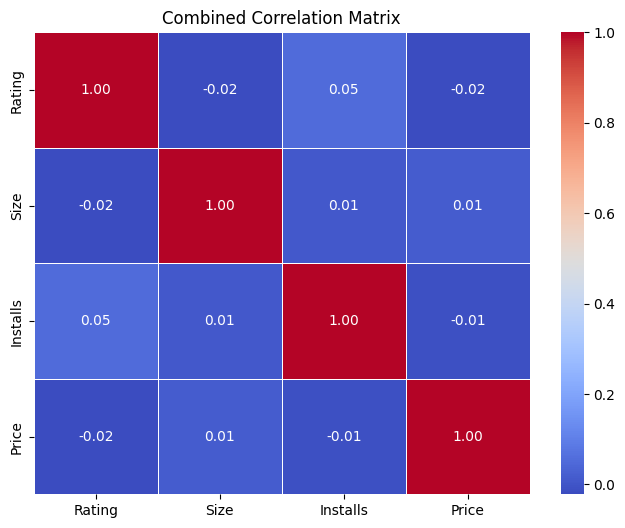

In [77]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
numeric_correlation_matrix = data[numeric_columns].corr()
# Combine both correlation matrices
combined_correlation_matrix = numeric_correlation_matrix.copy()

# Create a heatmap using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Combined Correlation Matrix')
plt.show()

In [78]:
data.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [79]:
data.duplicated().sum()

540

In [80]:
# checking for null values
data.isna().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

In [81]:
data.shape

(10840, 9)

In [82]:
# Handling missing values
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data['Type'].fillna('Free', inplace=True)

# Preprocessing Type column
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'Paid' else 0)

In [83]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [84]:
# checking for null values
data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [85]:
data['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01, 3.70354401e+01, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 2.01000000e+02, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [86]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

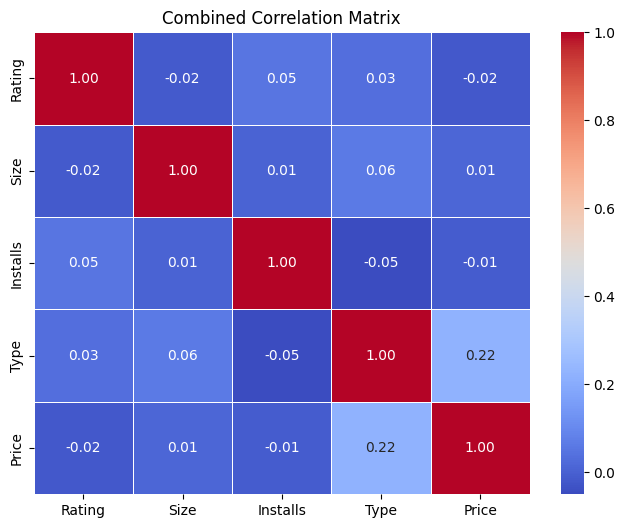

In [87]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
numeric_correlation_matrix = data[numeric_columns].corr()
# Combine both correlation matrices
combined_correlation_matrix = numeric_correlation_matrix.copy()

# Create a heatmap using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Combined Correlation Matrix')
plt.show()

In [88]:
data.to_csv('out.csv',index=False)

# Model Machine Learning

In [89]:
data.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [90]:
X = data.drop(columns=['Rating'])
y = data['Rating']

# Perform label encoding if there are categorical features
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X.loc[:, col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [91]:
def residuals_ana(pred):
    # Residual analysis for Regression
    residuals = y_test - pred
    plt.scatter(y_test, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residual Analysis')
    plt.xlabel('Actual Rating')
    plt.ylabel('Residuals')
    plt.show()


# Linear Regression

In [92]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)


LinearRegression()

Linear Regression MAE: 0.31607511813217537
Linear Regression MSE: 0.21188063253890016


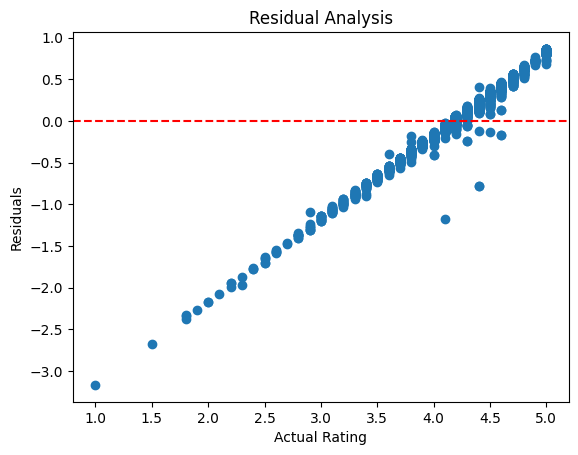

In [93]:
linear_reg_pred = linear_reg.predict(X_test_scaled)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MAE:", linear_reg_mae)
print("Linear Regression MSE:", linear_reg_mse)
residuals_ana(linear_reg_pred)

# KNN

In [94]:
# K-Nearest Neighbors
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

KNN Regression MAE: 0.34281248432151823
KNN Regression MSE: 0.23655416622121134


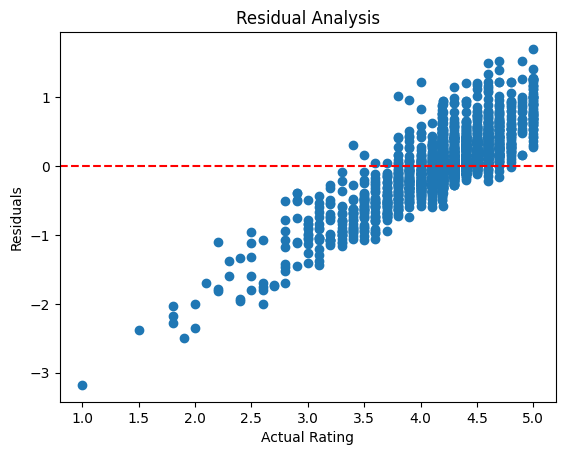

In [95]:
knn_reg_pred = knn_reg.predict(X_test_scaled)
knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)
knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)
print("KNN Regression MAE:", knn_reg_mae)
print("KNN Regression MSE:", knn_reg_mse)
residuals_ana(knn_reg_pred)

# Decision Tree

In [96]:
# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

Decision Tree Regression MAE: 0.38566549324244487
Decision Tree Regression MSE: 0.3900109800736087


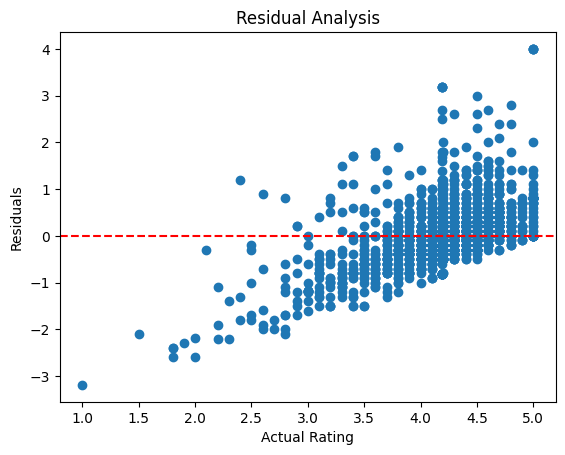

In [97]:
dt_reg_pred = dt_reg.predict(X_test_scaled)
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
print("Decision Tree Regression MAE:", dt_reg_mae)
print("Decision Tree Regression MSE:", dt_reg_mse)
residuals_ana(dt_reg_pred)

# Random Forest

In [98]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

Random Forest Regression MAE: 0.29741447370921625
Random Forest Regression MSE: 0.19711550681549533


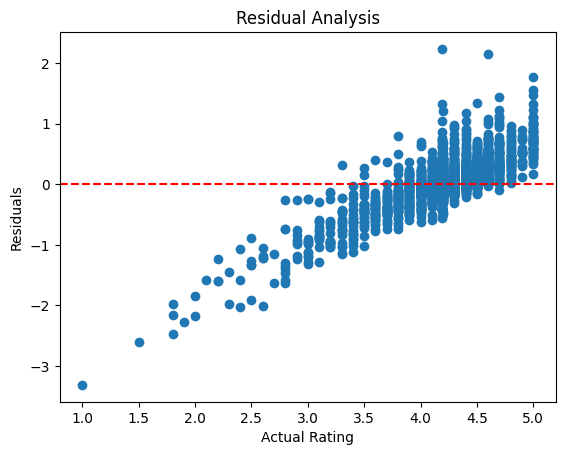

In [99]:
rf_reg_pred = rf_reg.predict(X_test_scaled)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
print("Random Forest Regression MAE:", rf_reg_mae)
print("Random Forest Regression MSE:", rf_reg_mse)
residuals_ana(rf_reg_pred)

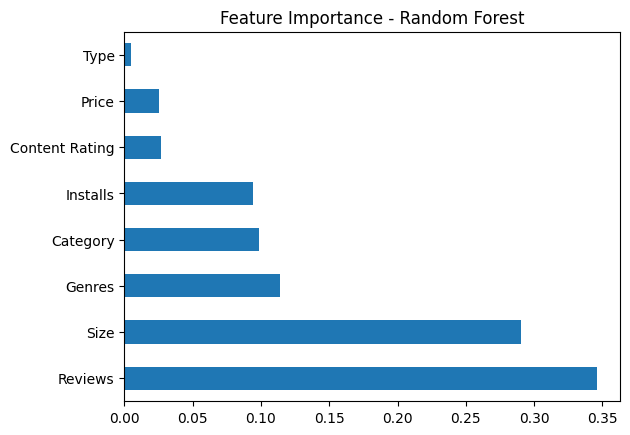

In [100]:
# Feature importance for Random Forest
feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances.plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.show()

# Gradient Boosting

In [101]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

Gradient Boosting Regression MAE: 0.294454149070288
Gradient Boosting Regression MSE: 0.18245055723549117


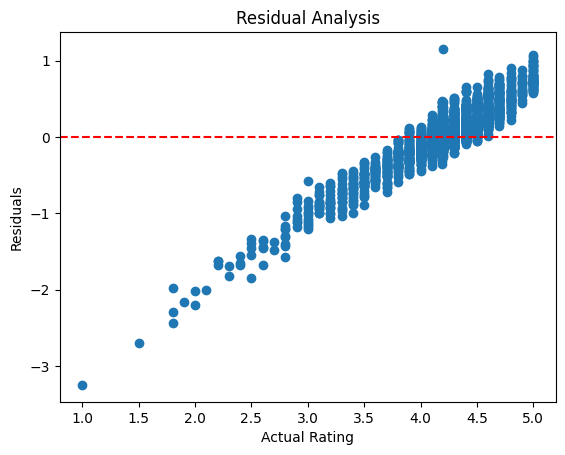

In [102]:
# Predict the target variable for the test set
gb_reg_pred = gb_reg.predict(X_test_scaled)

# Evaluate the model
gb_reg_mae = mean_absolute_error(y_test, gb_reg_pred)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)

print("Gradient Boosting Regression MAE:", gb_reg_mae)
print("Gradient Boosting Regression MSE:", gb_reg_mse)
residuals_ana(gb_reg_pred)

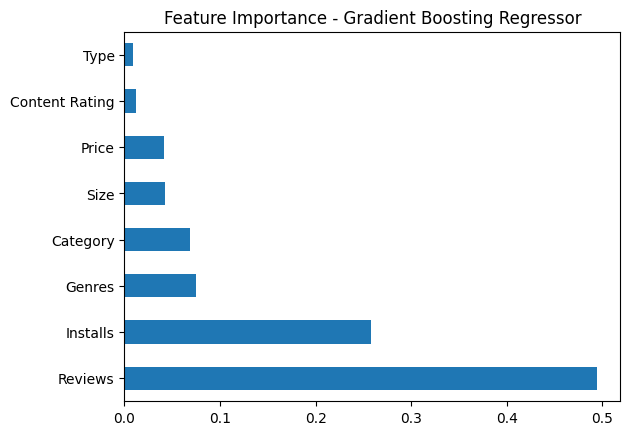

In [103]:
# Feature importance for Gradient Boosting Regressor
feature_importances = pd.Series(gb_reg.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances.plot(kind='barh')
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.show()

# Feed Forward Neural Network

In [122]:
import tensorflow as tf
from tensorflow import keras

# Build the model
model_ffnn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model_ffnn.compile(optimizer='adam', loss='mean_squared_error')

# Model training
history_ffnn = model_ffnn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
mse_ffnn = model_ffnn.evaluate(X_test_scaled, y_test)

Epoch 1/100
206/206 [==============================] - 1s 2ms/step - loss: 4.9909 - val_loss: 0.8056
Epoch 2/100
206/206 [==============================] - 0s 1ms/step - loss: 0.5767 - val_loss: 0.4301
Epoch 3/100
206/206 [==============================] - 0s 1ms/step - loss: 0.3689 - val_loss: 0.3206
Epoch 4/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2943 - val_loss: 0.2763
Epoch 5/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2679 - val_loss: 0.2579
Epoch 6/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2547 - val_loss: 0.2470
Epoch 7/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2473 - val_loss: 0.2426
Epoch 8/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2440 - val_loss: 0.2387
Epoch 9/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2406 - val_loss: 0.2392
Epoch 10/100
206/206 [==============================] - 0s 1ms/step - loss: 0.2391 - val_lo

MSE:  0.22404809296131134


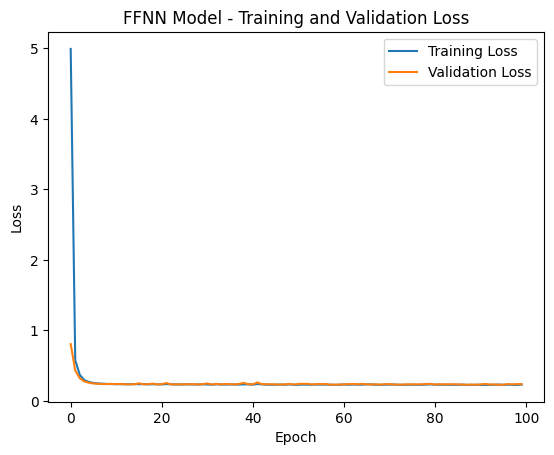

In [126]:
print("MSE: ", mse_ffnn)
# Plot training and validation loss
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FFNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### With Early stopping and Dropout

In [155]:
import tensorflow as tf
from tensorflow import keras

ES = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

# Build the model
model_ffnn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model_ffnn.compile(optimizer='adam', 
                   loss='mean_squared_error')

# Model training
history_ffnn = model_ffnn.fit(X_train_scaled, 
                              y_train, 
                              epochs=100, 
                              batch_size=32, 
                              validation_split=0.2,
                             callbacks = [ES])

# Evaluate the model on test data
mse_ffnn = model_ffnn.evaluate(X_test_scaled, y_test)

Epoch 1/100
206/206 [==============================] - 1s 3ms/step - loss: 4.6933 - val_loss: 0.5512
Epoch 2/100
206/206 [==============================] - 0s 2ms/step - loss: 1.9398 - val_loss: 0.3764
Epoch 3/100
206/206 [==============================] - 0s 2ms/step - loss: 1.6507 - val_loss: 0.4923
Epoch 4/100
206/206 [==============================] - 0s 2ms/step - loss: 1.4537 - val_loss: 0.3539
Epoch 5/100
206/206 [==============================] - 0s 2ms/step - loss: 1.3406 - val_loss: 0.4240
Epoch 6/100
206/206 [==============================] - 0s 2ms/step - loss: 1.2531 - val_loss: 0.4116
Epoch 7/100
206/206 [==============================] - 0s 2ms/step - loss: 1.1711 - val_loss: 0.2963
Epoch 8/100
206/206 [==============================] - 0s 2ms/step - loss: 1.0927 - val_loss: 0.3195
Epoch 9/100
206/206 [==============================] - 0s 2ms/step - loss: 1.0252 - val_loss: 0.2888
Epoch 10/100
206/206 [==============================] - 0s 2ms/step - loss: 0.9619 - val_lo

MSE:  0.2539210021495819


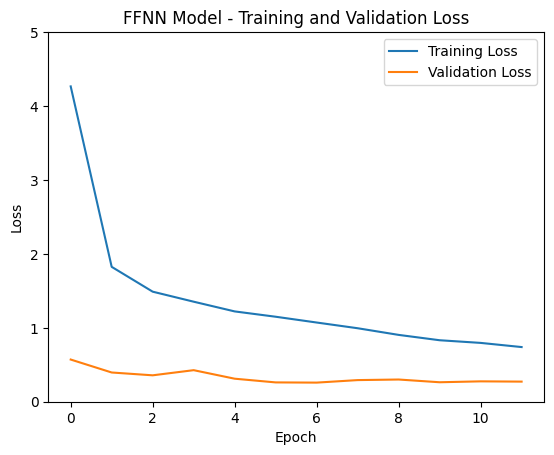

In [154]:
print("MSE: ", mse_ffnn)
# Plot training and validation loss
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FFNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0,5))
plt.legend()
plt.show()

# Reccurent Neural Network 

In [141]:
# Convert data into time series format
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the model
model_rnn = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Model training
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs= 100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
mse_rnn = model_rnn.evaluate(X_test_rnn, y_test)

Epoch 1/100
206/206 [==============================] - 2s 3ms/step - loss: 5.9243 - val_loss: 1.0389
Epoch 2/100
206/206 [==============================] - 0s 2ms/step - loss: 0.7233 - val_loss: 0.5486
Epoch 3/100
206/206 [==============================] - 0s 2ms/step - loss: 0.4545 - val_loss: 0.3855
Epoch 4/100
206/206 [==============================] - 0s 2ms/step - loss: 0.3451 - val_loss: 0.3148
Epoch 5/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2964 - val_loss: 0.2766
Epoch 6/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2731 - val_loss: 0.2608
Epoch 7/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2585 - val_loss: 0.2532
Epoch 8/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2499 - val_loss: 0.2458
Epoch 9/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2457 - val_loss: 0.2428
Epoch 10/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2435 - val_lo

MSE:  0.20719467103481293


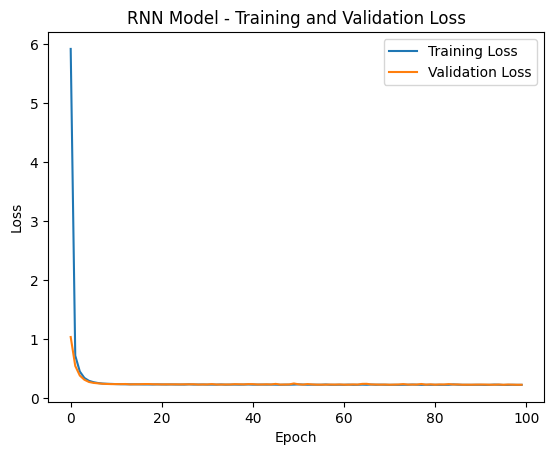

In [144]:
print("MSE: ", mse_rnn)
# Plot training and validation loss
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### With Early stopping and Dropout

In [185]:
from tensorflow import keras

ES = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

# Build the model
model_ffnn = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', 
                           input_shape=(1, X_train_scaled.shape[1])),
    keras.layers.Dropout(.5),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model_rnn.compile(optimizer='adam', 
                   loss='mean_squared_error')

# Model training
history_rnn = model_rnn.fit(X_train_rnn, 
                              y_train, 
                              epochs=100, 
                              batch_size=32, 
                              validation_split=0.2,
                             callbacks = [ES])
# Evaluate the model on test data
mse_rnn = model_rnn.evaluate(X_test_rnn, y_test)

Epoch 1/100
206/206 [==============================] - 1s 3ms/step - loss: 0.2234 - val_loss: 0.2389
Epoch 2/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2239 - val_loss: 0.2292
Epoch 3/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2228 - val_loss: 0.2353
Epoch 4/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2238 - val_loss: 0.2311
Epoch 5/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2235 - val_loss: 0.2342
Epoch 6/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2238 - val_loss: 0.2292
Epoch 7/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2251 - val_loss: 0.2328
Epoch 8/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2230 - val_loss: 0.2301
Epoch 9/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2240 - val_loss: 0.2310
Epoch 10/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2230 - val_lo

MSE:  0.2045293152332306


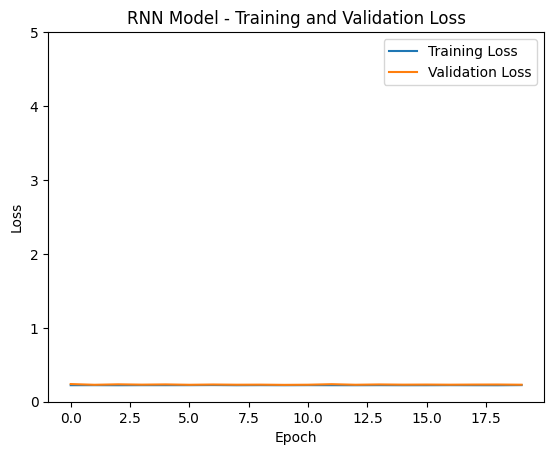

In [186]:
print("MSE: ", mse_rnn)
# Plot training and validation loss
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim((0,5))
plt.legend()
plt.show()